## Tesseract MRZ lang

https://github.com/DoubangoTelecom/tesseractMRZ

https://github.com/egemenzeytinci/readmrz

In [1]:
import cv2
import pytesseract
import utils

In [2]:
image = cv2.imread("assets/id_card.jpg")
base_image = image.copy()

In [3]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [4]:
cv2.imwrite("temp/gray.jpg", gray)

True

In [5]:
def blur_image(image, iter: 1):
    for _ in range(iter):
        image = cv2.GaussianBlur(image, (17, 17), 0)
    return image

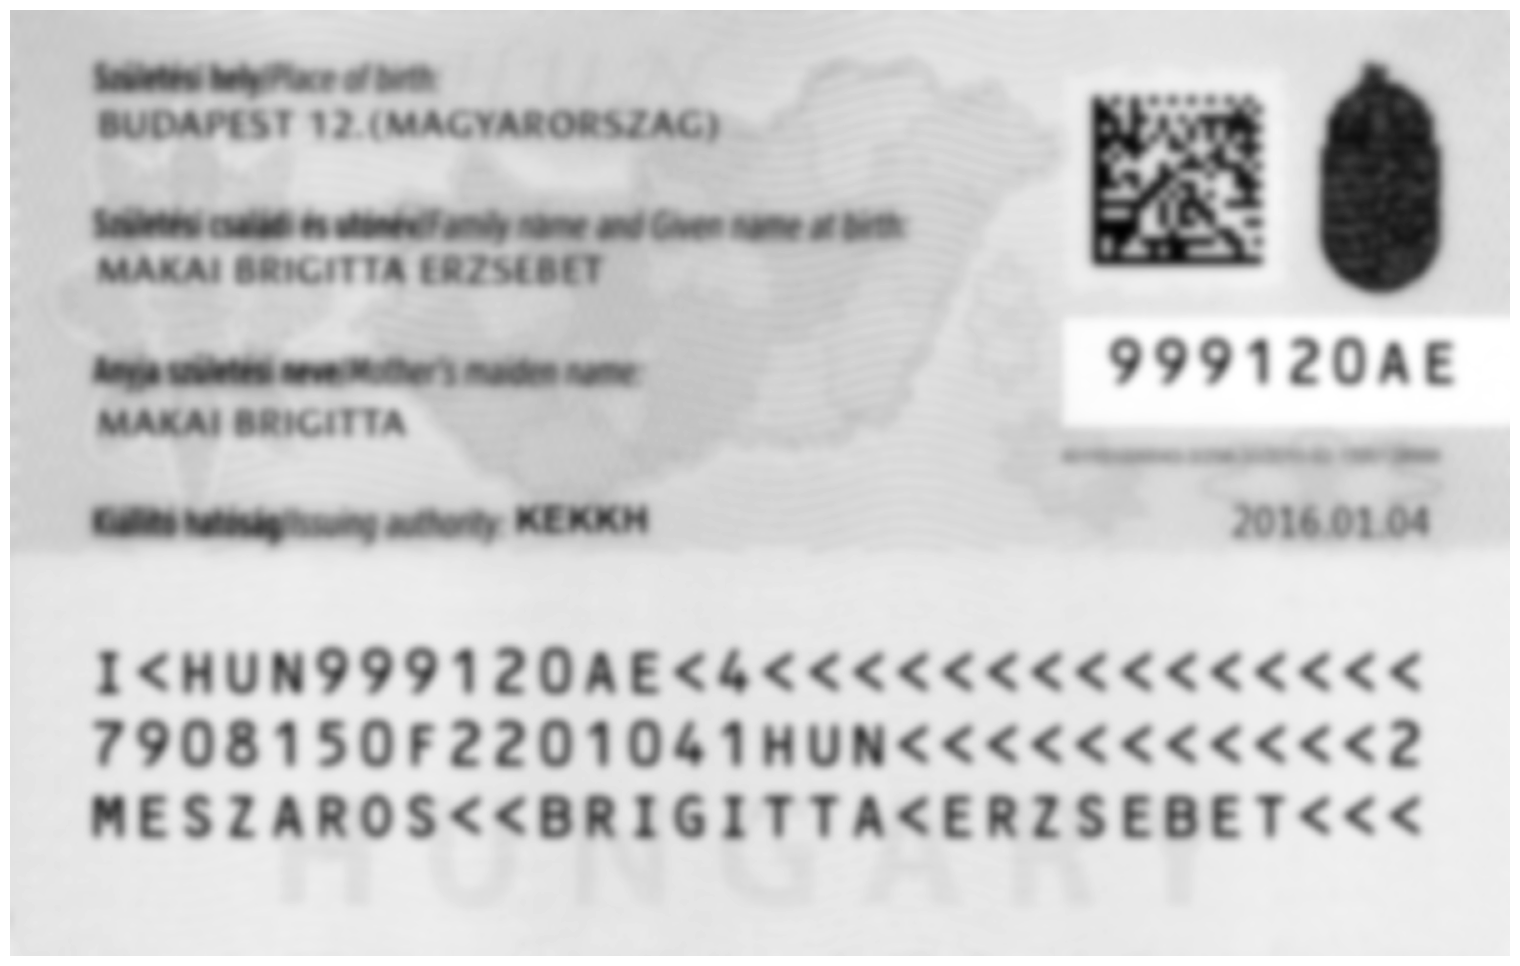

In [27]:
blur = cv2.GaussianBlur(gray, (21, 21), 0)

utils.display(blur)

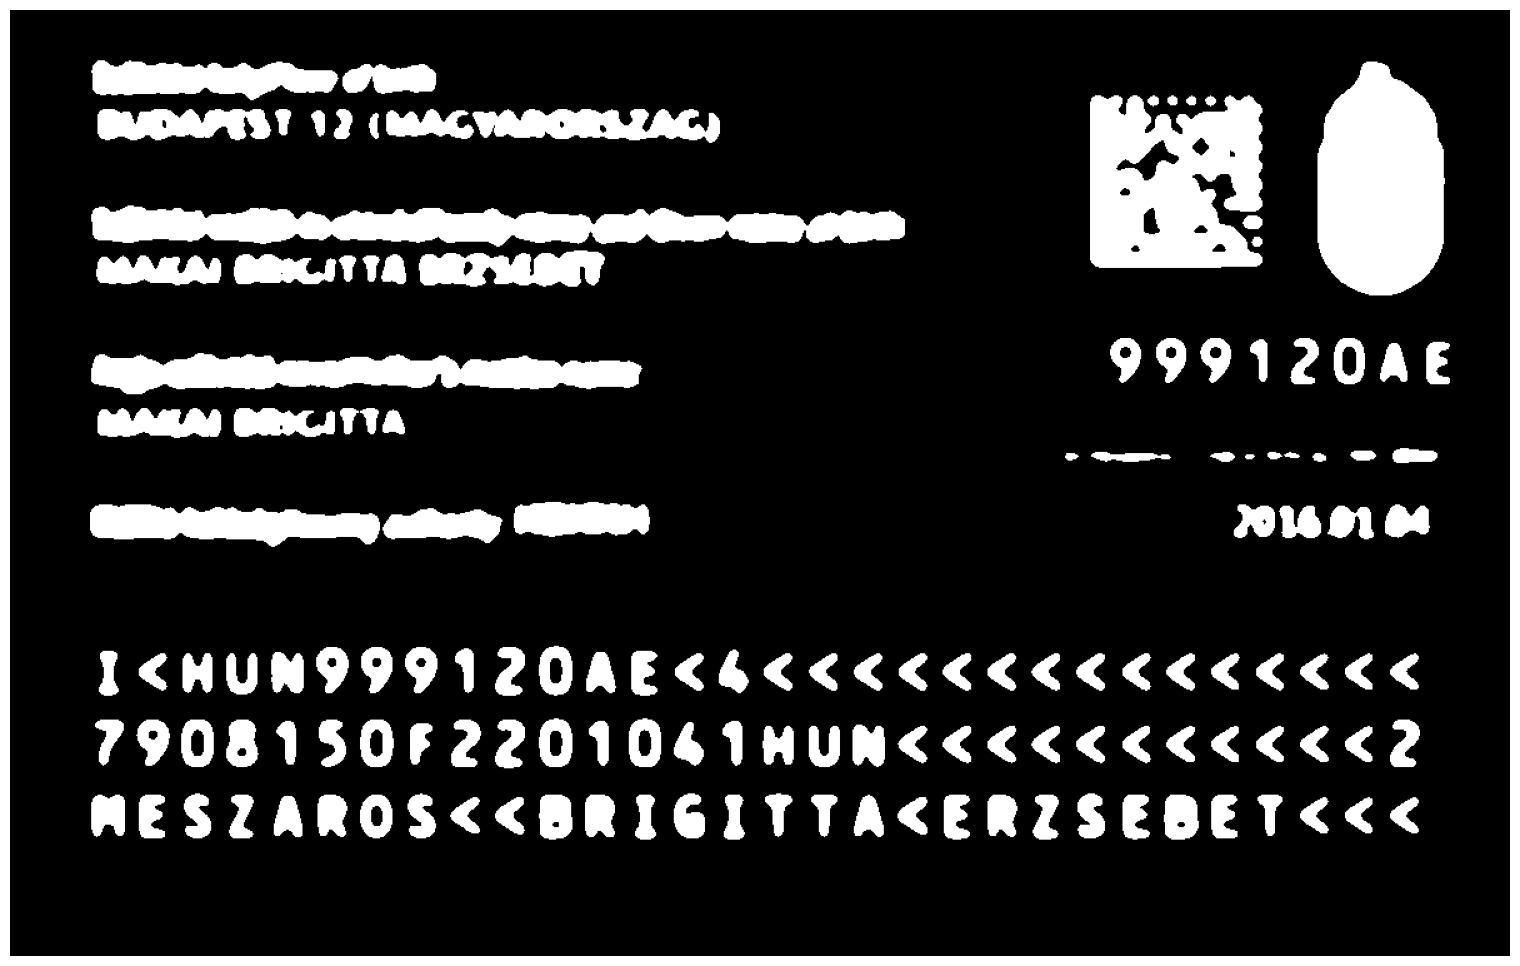

In [28]:
_, thresh = cv2.threshold(blur, 0, 200, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
utils.display(thresh)

In [29]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
utils.display(kernel)

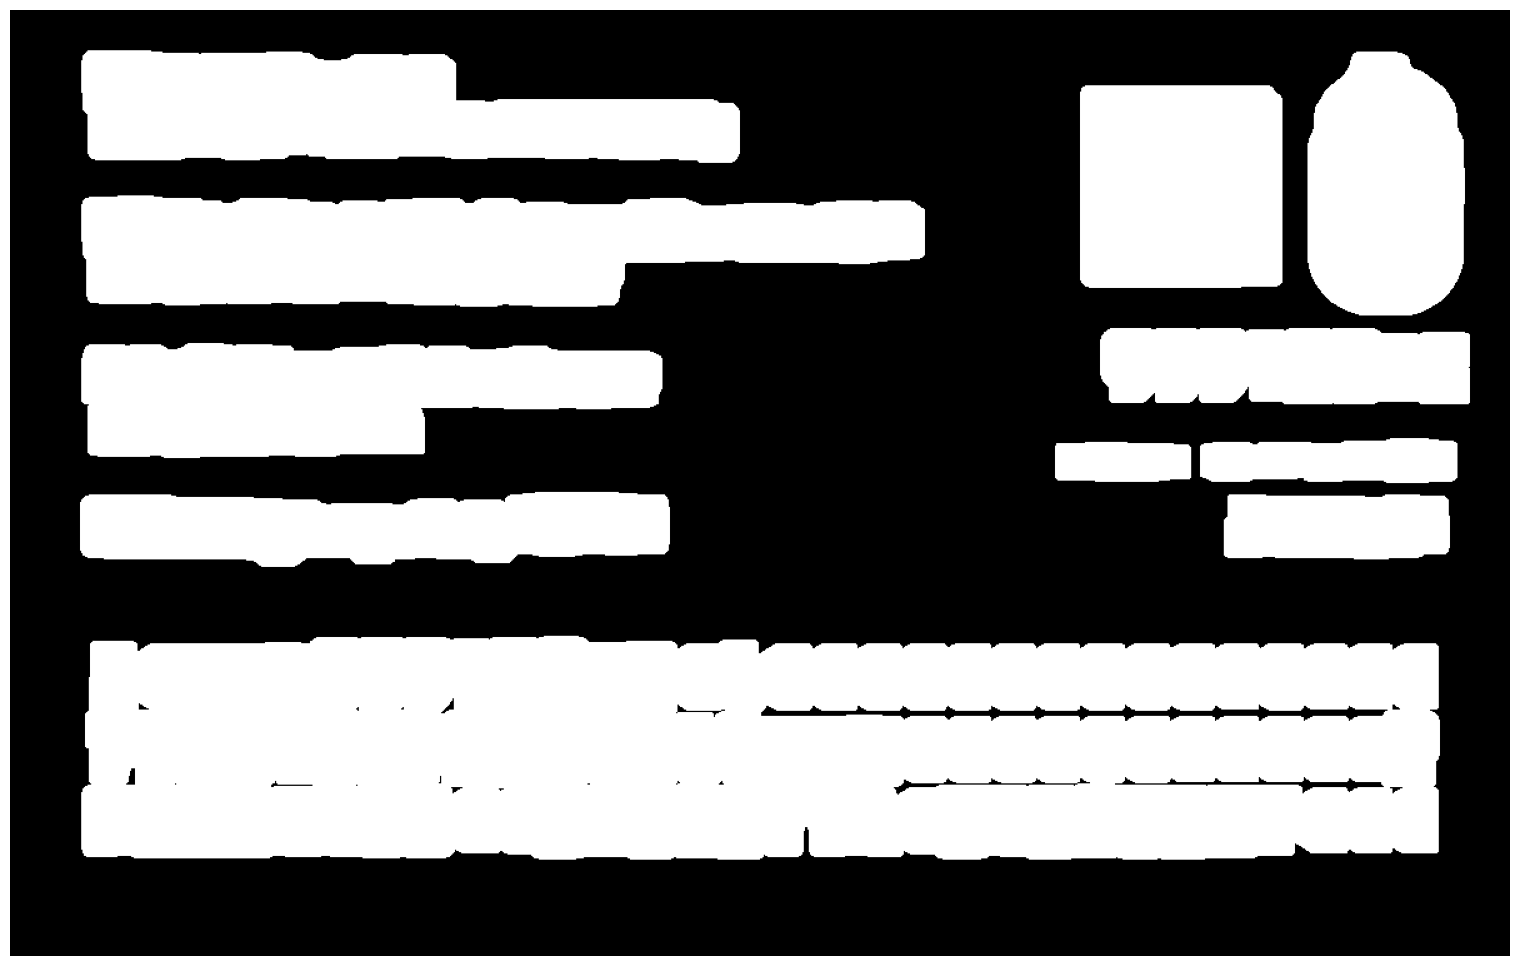

In [30]:
dilate = cv2.dilate(thresh, kernel, iterations=8)
utils.display(dilate)

In [31]:
cnts, _ = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [32]:
cnts_sorted = sorted(cnts, key=cv2.contourArea, reverse=True)

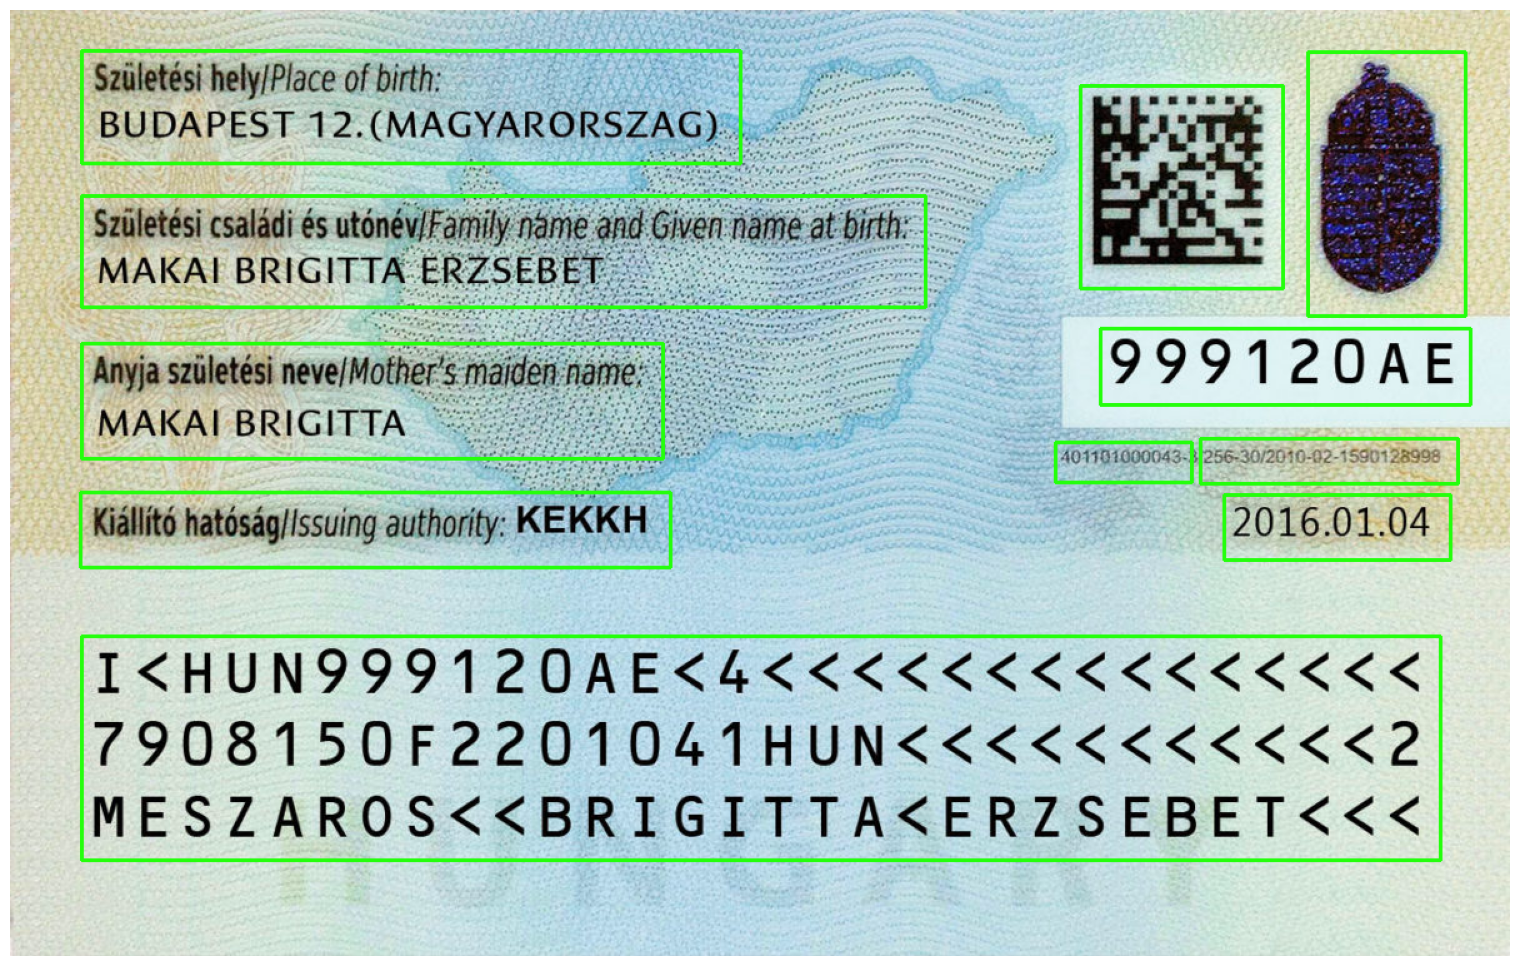

In [33]:
image = base_image.copy()

for c in cnts_sorted:
    x, y, w, h = cv2.boundingRect(c)
    # if h > 200 and w > 20:
    # roi = image[y : y + h, x : x + h]
    # cv2.imwrite("temp/roi.png", roi)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
utils.display(image)

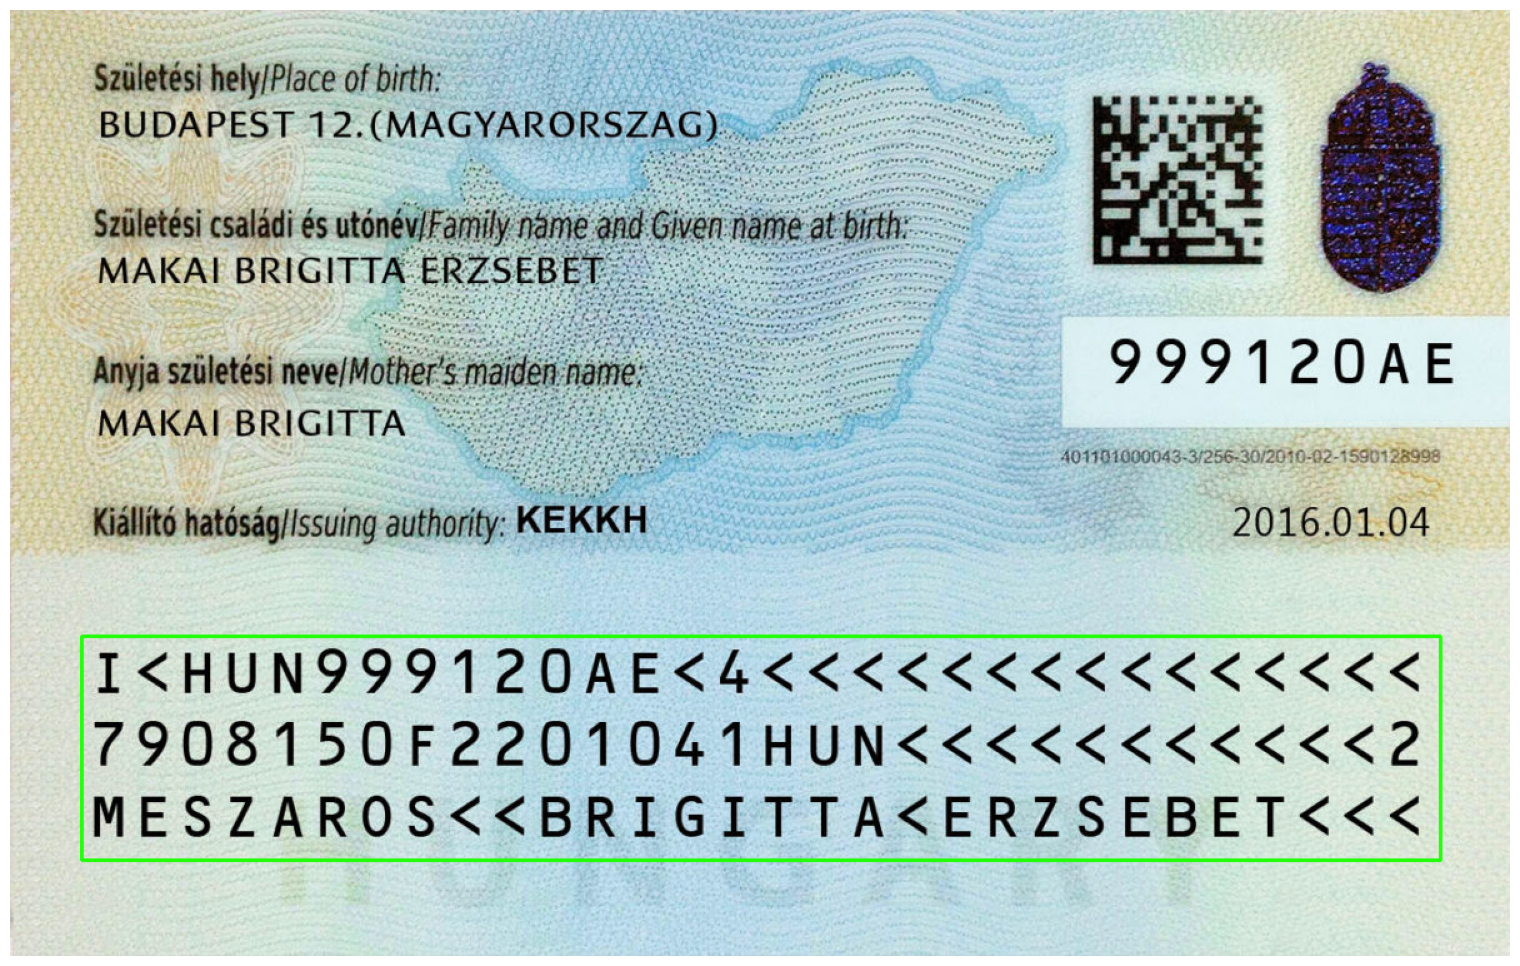

In [34]:
image = base_image.copy()

if len(cnts_sorted) > 0:
    x, y, w, h = cv2.boundingRect(cnts[0])
    roi = image[y : y + h, x : x + w]
    cv2.imwrite("temp/roi.png", roi)
    cv2.rectangle(image, (x, y), (x + w, y + h), (36, 255, 12), 2)
cv2.imwrite("temp/bbox_new.png", image)
utils.display(image)

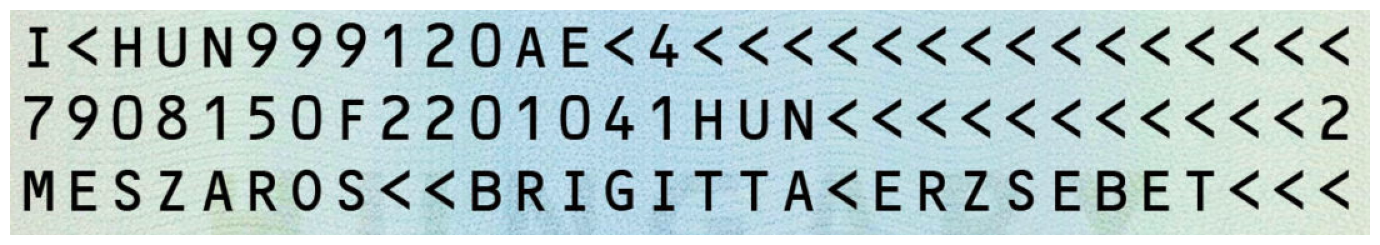

In [26]:
mrz = cv2.imread("temp/roi.png")

utils.display(mrz)

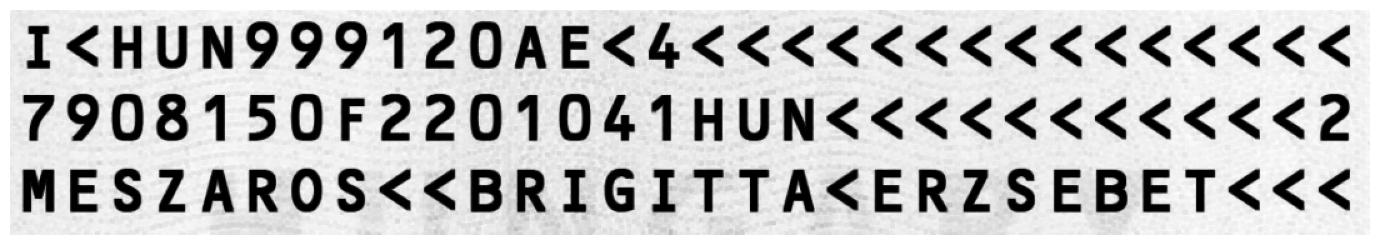

I<HUNI99120AE<K4<<<<K< <<< <<< <<<
7908150F2201041HUN<<<<<<<<<<<2
MESZAROS<K<BRIGITTA<KERZSEBET<<<



In [29]:
mrz_tmp = cv2.cvtColor(mrz, cv2.COLOR_BGR2GRAY)
mrz_tmp = utils.thick_font(mrz_tmp, kernel=(3, 3))
# mrz_tmp = cv2.bitwise_not(mrz_tmp)
# _, mrz_tmp = cv2.threshold(mrz_tmp, 95, 255, cv2.THRESH_BINARY)

utils.display(mrz_tmp)

cv2.imwrite("temp/roi2.png", mrz_tmp)

mrz_text = pytesseract.image_to_string(mrz_tmp)
print(mrz_text)